In [62]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [108]:
def plot_curves(log_dir, window_size=5, start=0, end=100000):
    filename = log_dir + 'loss_and_accuracy_log.txt'
    columns = ['epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc']
    df = pd.read_csv(filename, header=None, names=columns)
    if pd.isnull(df.iloc[-1]['val_acc']): df = df[:-1] #truncate last row if incomplete
        
    rolling_avgs = df.rolling(window_size, min_periods=1).mean()
        
    end = min(end, len(df))
    
    for train_col, val_col, train_label, val_label in [('train_loss', 'val_loss', 'Train loss', 'Val loss'),
        ('train_acc', 'val_acc', 'Train accuracy', 'Val accuracy')]:

        plt.plot(range(start, end), df[train_col][start:end], 'r.', label=train_label)
        plt.plot(range(start, end), df[val_col][start:end], 'g.', label=val_label)

        plt.plot(range(start, end), rolling_avgs[train_col][start:end], 
                 'r', label='{} moving average'.format(train_label))
        plt.plot(range(start, end), rolling_avgs[val_col][start:end], 
                 'g', label='{} moving average'.format(val_label))

        plt.legend()
        plt.show()
    

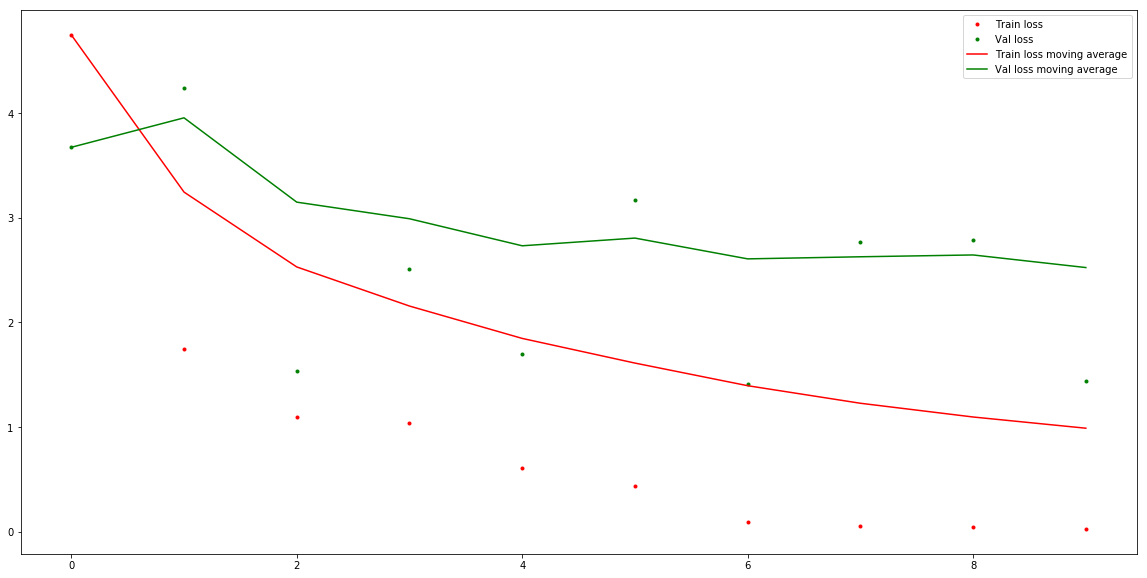

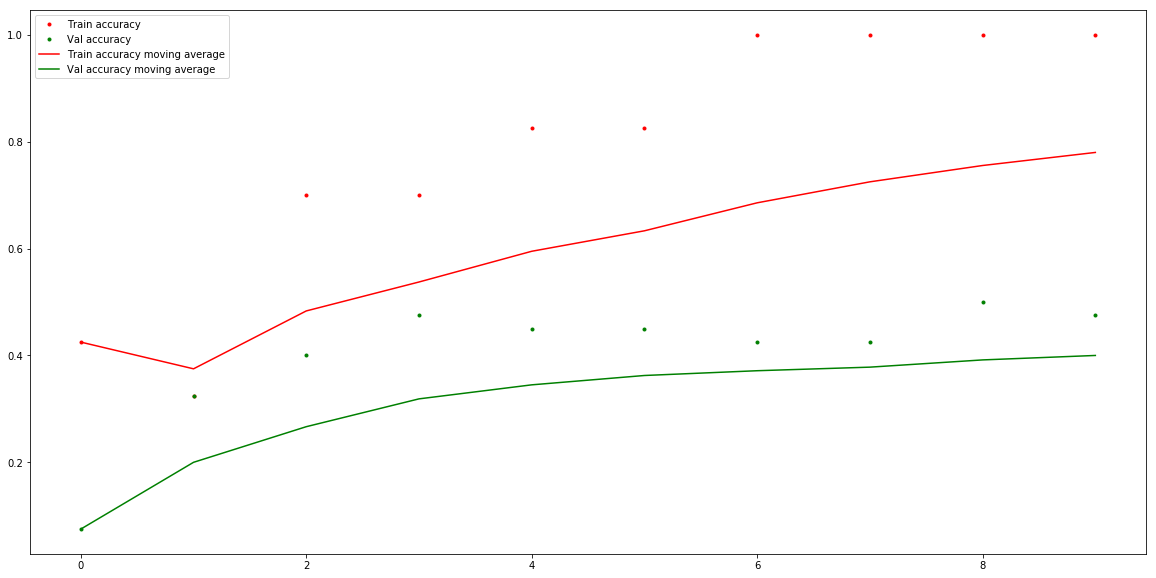

In [112]:
plot_curves('logs/2019-06-01_16-12-02/', window_size=15)

In [111]:
import torch
torch.__version__

'1.1.0'